In [67]:
# Importing Pandas to create DataFrame
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [68]:
def calculate_reputation(rating, price, transactiontime, prev_reputation, sum_P, sum_N):
    var_time = np.tan(abs(transactiontime))
    var_amount = np.log(1+price)

    if rating > 0:
        positive = var_time * var_amount * prev_reputation * rating
        negative = 0
        new_rep = abs(sum_P + positive)/ (abs(sum_P+positive)+abs(sum_N))
        
    else:
        negative = var_time * var_amount * prev_reputation * rating
        positive = 0
        new_rep = abs(sum_P)/ (abs(sum_P)+abs(sum_N + negative))


    return new_rep, sum_P+positive, sum_N+negative
        

# Simulation 1: Can a user artificially inflate his reputation score within a short period of time? 


**Considerations**
1. If so, what is the tolerance?
2. How long before the reputation can be increased?

**Notes**
1. Here, the attacker spams review every hour. 
2. Different values of the hyperparameters are explored to choose the ones best to resist such attacks. 

Number of transactions needed:  364
Number of hours:  364.0
Number of days:  15.166666666666666
Reputation Score:  0.9999900143680864


Text(0, 0.5, 'Reputation score')

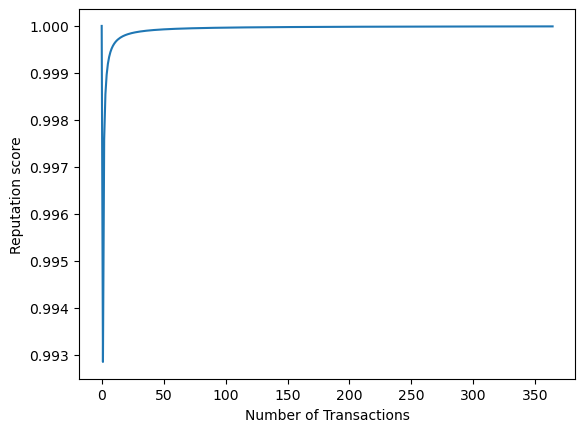

In [72]:
#declaring first time user parameters
user_sum_p = 1.0
user_sum_n = 1.0
#if S+ and S- are set to 1 and 0 respectively, we know that the reputation score starts at 1.0
user_rep = user_sum_p/(user_sum_p+user_sum_n)
price=2322070000000000.0 #5USD
# price = 443866700000000000.0 #1000USD
# price = 1000000000000000000.0 #2k USD
# total_time_passed = 0.0 
time_difference = 1.0
total_time_passed = 0.0

repList = []
repList.append(1.0)

count = 0

while user_rep <= 0.99999 and user_rep>0.0 and count<10000: 
        user_rep, user_sum_p, user_sum_n = calculate_reputation(5, price, time_difference, user_rep, user_sum_p, user_sum_n)
        repList.append(user_rep)
        total_time_passed += time_difference
        count += 1

        
print("Number of transactions needed: ", len(repList)-1)
print("Number of hours: ",(total_time_passed))
print("Number of days: ", (total_time_passed)/24)
print("Reputation Score: ", user_rep)


x = [i for i in range(len(repList))]
y = repList
plt.plot(x,y)
plt.xlabel("Number of Transactions")
plt.ylabel("Reputation score")

Text(0.5, 0, 'Initial Negative Ratings')

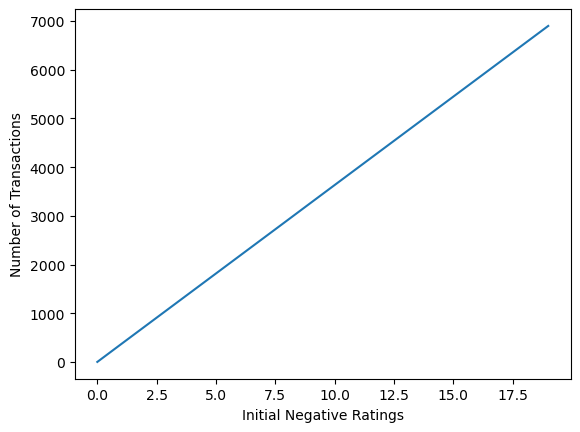

In [73]:
def sim(init_n):
    #declaring first time user parameters
    user_sum_p = 1.0
    user_sum_n = init_n
    #if S+ and S- are set to 1 and 0 respectively, we know that the reputation score starts at 1.0
    user_rep = user_sum_p/(user_sum_p+user_sum_n)
    price=2322070000000000.0 #5USD
    # price = 443866700000000000.0 #1000USD
    # price = 1000000000000000000.0 #2k USD
    # total_time_passed = 0.0 
    time_difference = 1.0
    total_time_passed = 0.0
    
    repList = []
    repList.append(1.0)
    
    count = 0
    
    while user_rep <= 0.99999 and user_rep>0.0: 
            user_rep, user_sum_p, user_sum_n = calculate_reputation(5, price, time_difference, user_rep, user_sum_p, user_sum_n)
            repList.append(user_rep)
            total_time_passed += time_difference
            count += 1
    return len(repList)


transactions_list = []
for i in range(0, 20):
    transactions_list.append(sim(i))


x = [i for i in range(0, 20)]
y = transactions_list
plt.plot(x,y)
plt.ylabel("Number of Transactions")
plt.xlabel("Initial Negative Ratings")

# Simulation 1: Can users collude to reduce another's reputation score within a short period of time? 


**Considerations**
1. If so, what is the tolerance?
2. How long before the reputation can be increased?

**Notes**
1. Here, the attacker spams review every hour. 
2. Different values of the hyperparameters are explored to choose the ones best to resist such attacks. 

Number of transactions needed:  10
Number of hours:  240.0
Number of days:  10.0
Reputation Score:  0.011764497404034766


Text(0, 0.5, 'Reputation score')

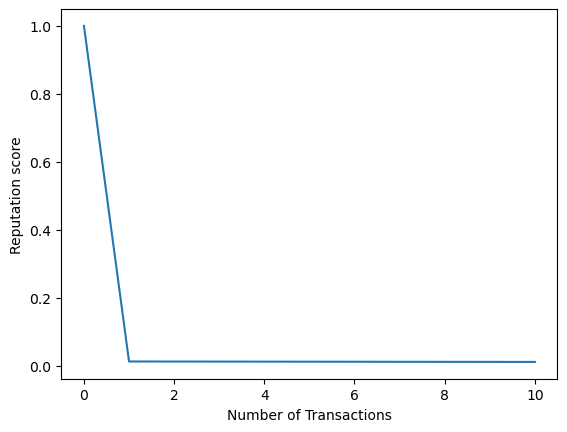

In [74]:
#declaring first time user parameters
user_sum_p = 1.0
user_sum_n = 0.0
#if S+ and S- are set to 1 and 0 respectively, we know that the reputation score starts at 1.0
user_rep = 1.0
price=2322070000000000.0 #5USD
# price = 443866700000000000.0 #1000USD
# price = 1000000000000000000.0 #2k USD
# total_time_passed = 0.0 
time_difference = 24.0
total_time_passed = 0.0

repList = []
repList.append(1.0)

count = 0

while user_rep <= 1.0 and user_rep>0.0 and count<10: 
        user_rep, user_sum_p, user_sum_n = calculate_reputation(-1, price, time_difference, user_rep, user_sum_p, user_sum_n)
        repList.append(user_rep)
        total_time_passed += time_difference
        count += 1

        
print("Number of transactions needed: ", len(repList)-1)
print("Number of hours: ",(total_time_passed))
print("Number of days: ", (total_time_passed)/24)
print("Reputation Score: ", user_rep)


x = [i for i in range(len(repList))]
y = repList
plt.plot(x,y)
plt.xlabel("Number of Transactions")
plt.ylabel("Reputation score")

# Simulation Lowering each other's Rating

In [59]:
#declaring first time user parameters
buyer_sum_p = 1.0
buyer_sum_n = 1.0
#if S+ and S- are set to 1 and 0 respectively, we know that the reputation score starts at 1.0
buyer_rep = 1.0

seller_sum_p = 1.0
seller_sum_n = 0.0
#if S+ and S- are set to 1 and 0 respectively, we know that the reputation score starts at 1.0
seller_rep = 1.0
price=2322070000000000.0 #5USD
# price = 443866700000000000.0 #1000USD
# price = 1000000000000000000.0 #2k USD
# total_time_passed = 0.0 
time_difference = 24.0
total_time_passed = 0.0

buyer_repList = []
buyer_repList.append(1.0)
seller_repList = []
seller_repList.append(1.0)

count = 0


while count<100 and buyer_rep>=0 and user_rep>=0.01: 
        buyer_rep, buyer_sum_p, buyer_sum_n = calculate_reputation(-1, price, time_difference, buyer_rep, buyer_sum_p, buyer_sum_n)
        buyer_repList.append(buyer_rep)
        seller_rep, seller_sum_p, seller_sum_n = calculate_reputation(-1, price, time_difference, seller_rep, seller_sum_p, seller_sum_n)
        seller_repList.append(seller_rep)
        total_time_passed += time_difference
        count += 1

        
print("Number of transactions needed: ", len(buyer_repList)-1)
print("Number of hours: ",(total_time_passed))
print("Number of days: ", (total_time_passed)/24)
print("Reputation Score of buyer: ", buyer_rep)
print("Reputation Score of seller: ", seller_rep)


Number of transactions needed:  100
Number of hours:  2400.0
Number of days:  100.0
Reputation Score of buyer:  0.00689816875975833
Reputation Score of seller:  0.006923477522253254


Text(0, 0.5, 'Buyer Reputation score')

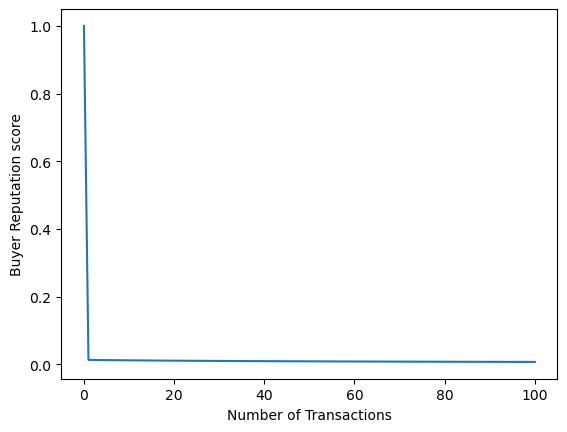

In [60]:
x = [i for i in range(len(buyer_repList))]
y = buyer_repList
y1 = seller_repList
plt.plot(x,y)
plt.xlabel("Number of Transactions")
plt.ylabel("Buyer Reputation score")

Text(0, 0.5, 'Seller Reputation score')

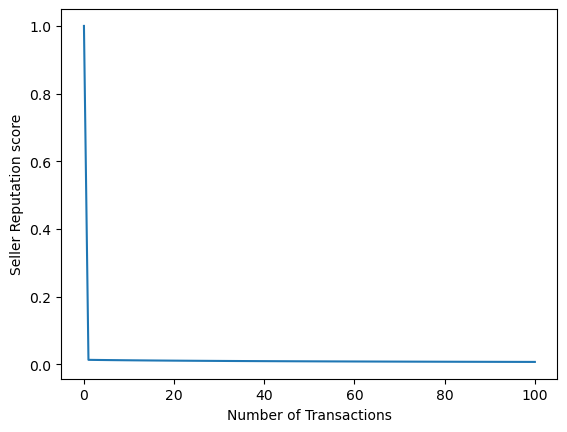

In [61]:
x = [i for i in range(len(buyer_repList))]
y = buyer_repList
y1 = seller_repList
plt.plot(x,y1)
plt.xlabel("Number of Transactions")
plt.ylabel("Seller Reputation score")